# 互评作业1：数据探索性分析与数据预处理
## 数据集1：[Github Dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset?select=repository_data.csv) Version 2
### 1.数据摘要
#### 1.1属性
- `name` 仓库的名称
- `stars_count` 仓库的star数量
- `forks_count` 仓库的fork数量
- `watchers` 仓库当前有多少观看者
- `pull_requests` 拉取该仓库的请求数量
- `primary_language` 仓库主要使用的编程语言
- `languages_used` 该仓库所有使用过的编程语言的列表
- `commit_count` 该仓库的提交记录数量
- `create_at` 仓库创建的时间和日期
- ` license` 这个仓库使用的证书

In [62]:
import pandas as pd

github_df = pd.read_csv("github/repository_data.csv")
github_df.columns.tolist()

['name',
 'stars_count',
 'forks_count',
 'watchers',
 'pull_requests',
 'primary_language',
 'languages_used',
 'commit_count',
 'created_at',
 'licence']

#### 1.2标称属性
- `name` 仓库的名称

`name`频数：

In [51]:
github_df['name'].value_counts()

name
dotfiles                                 5590
blog                                     2038
docs                                     1350
website                                  1163
scripts                                   649
                                         ... 
markdown-to-presentation                    1
moodle-client                               1
event-sourcing-graph                        1
react-native-100-Demos                      1
MSI-Z690-Carbon-i7-12700KF-Hackintosh       1
Name: count, Length: 2410862, dtype: int64

- `primary_language` 仓库主要使用的编程语言

`primary_language`频数：

In [52]:
github_df['primary_language'].value_counts()

primary_language
JavaScript              451954
Python                  451473
Java                    202394
C++                     150066
PHP                     116058
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: count, Length: 497, dtype: int64

- `languages_used` 该仓库所有使用过的编程语言的列表

`languages_used`频数：

In [53]:
github_df['languages_used'].value_counts()

languages_used
['Python']                                                        257679
['JavaScript']                                                    157741
['Java']                                                          117624
['C#']                                                             60299
['PHP']                                                            56333
                                                                   ...  
['Svelte', 'TypeScript', 'JavaScript', 'HTML', 'CSS', 'Rust']          1
['Dockerfile', 'Shell', 'JavaScript', 'PowerShell']                    1
['TypeScript', 'HTML', 'Vue', 'JavaScript', 'Python', 'Shell']         1
['C++', 'C', 'Pascal', 'Batchfile', 'GDB']                             1
['HTML', 'C++', 'TypeScript', 'JavaScript']                            1
Name: count, Length: 328148, dtype: int64

- ` license` 这个仓库使用的证书

`license`频数：

In [54]:
github_df['licence'].value_counts()

licence
MIT License                                                   784251
Apache License 2.0                                            210698
Other                                                         167987
GNU General Public License v3.0                               159443
BSD 3-Clause "New" or "Revised" License                        47078
GNU General Public License v2.0                                43297
GNU Affero General Public License v3.0                         21554
BSD 2-Clause "Simplified" License                              16819
The Unlicense                                                  14400
GNU Lesser General Public License v3.0                         14002
Mozilla Public License 2.0                                     10668
Creative Commons Zero v1.0 Universal                           10353
ISC License                                                     8232
GNU Lesser General Public License v2.1                          6168
Eclipse Public License 1.0

#### 1.3数值属性
- `stars_count` 仓库打星数量

`stars_count`五数概括

In [55]:
github_df['stars_count'].describe()[3:]

min         2.0
25%         7.0
50%        12.0
75%        30.0
max    359805.0
Name: stars_count, dtype: float64

- `forks_count`仓库分支数量

`forks_count`五数概括

In [56]:
github_df['forks_count'].describe()[3:]

min         0.0
25%         1.0
50%         4.0
75%        11.0
max    242208.0
Name: forks_count, dtype: float64

- `watchers`观看者数量

`watchers`五数概括

In [57]:
github_df['watchers'].describe()[3:]

min       0.0
25%       2.0
50%       3.0
75%       6.0
max    9544.0
Name: watchers, dtype: float64

- `pull_requests`拉取请求数量

`pull_requests`五数概括

In [58]:
github_df['pull_requests'].describe()[3:]

min         0.0
25%         0.0
50%         1.0
75%         6.0
max    301585.0
Name: pull_requests, dtype: float64

- `commit_count`拉取请求数量

`commit_count`五数概括

In [59]:
github_df['commit_count'].describe()[3:] 

min          1.0
25%          9.0
50%         27.0
75%         89.0
max    4314502.0
Name: commit_count, dtype: float64

## 2.数据可视化
### 2.1主要编程语言

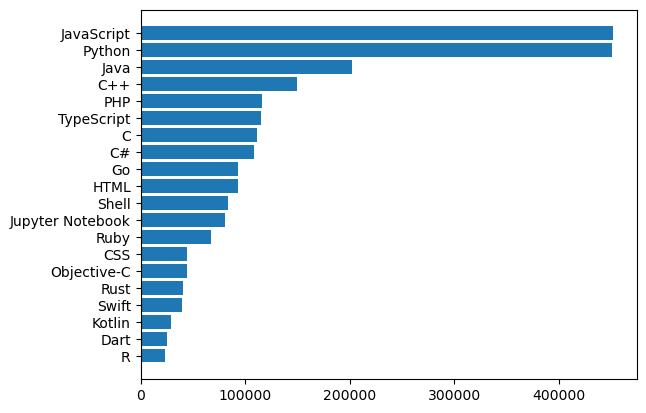

In [60]:
import matplotlib.pyplot as plt

category_counts = github_df['primary_language'].value_counts().sort_values()[-20:]
plt.barh(category_counts.index,category_counts.values)
plt.show()

### 2.2仓库创建时间

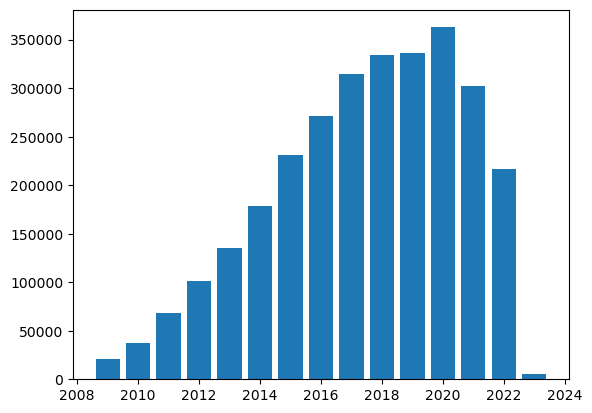

In [61]:
year_counts = pd.to_datetime(github_df['created_at']).dt.year.value_counts()
plt.bar(year_counts.index,year_counts.values)
plt.show()

### 2.3仓库各项数值属性

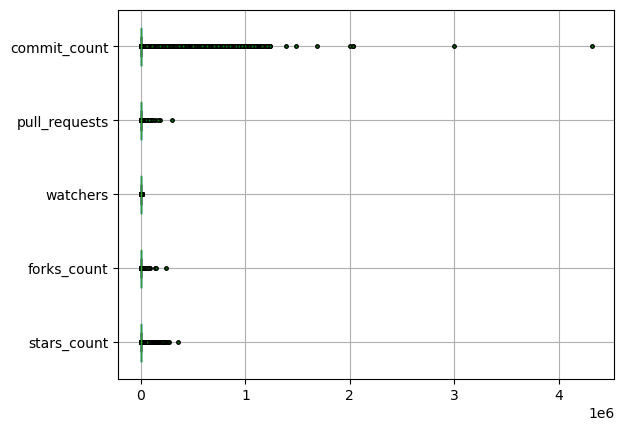

In [66]:
github_num = github_df[['stars_count','forks_count','watchers','pull_requests','commit_count']].dropna()
github_num.boxplot(flierprops={'marker': '.', 'markerfacecolor': 'green', 'markersize': 5, 'linestyle': 'none'},whis=(5,95),vert=False)
plt.show()

取消异常值

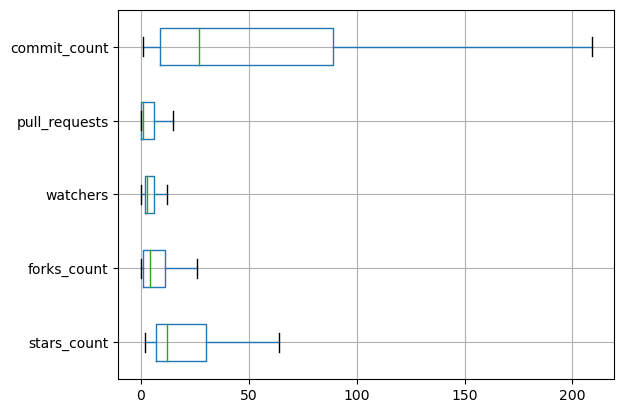

In [67]:
github_num.boxplot(showfliers=False,vert=False)
plt.show()

## 3.缺失值处理

In [45]:
missing_values = github_df.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['missing_count']).T
missing_values = missing_values.loc[:, (missing_values != 0).any(axis=0)]
missing_values

,name,primary_language,languages_used,commit_count,licence
missing_count,13,218573,221984,1921,1378200


### 3.1剔除缺失部分
去除了100多万行有缺失值的数据行

In [46]:
print(github_df.shape)
github_df_cleaned = github_df.dropna()
print(github_df_cleaned.shape)

(2917951, 10)
(1471611, 10)


### 3.2用最高频率值填补缺失值

In [47]:
github_df_cleaned = github_df.copy()
replace_values = missing_values.copy().rename(index={'missing_count':'replace_values'})
for col in replace_values.columns:
    if missing_values.loc['missing_count',col] == 0:
        continue
    mode = github_df[col].mode()[0]
    github_df_cleaned[col].fillna(mode,inplace=True)
    replace_values.loc['replace_values',col] = mode
replace_values

,name,primary_language,languages_used,commit_count,licence
replace_values,dotfiles,JavaScript,['Python'],2,MIT License


3.3用数据对象之间的相似性填补缺失值

这里采用热卡插补(由于Version 2数据量过大，需要较长时间的计算,这里用Version 1较小版本的数据进行代码展示，源代码在代码仓库中另附)

In [48]:
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances
import pandas as pd
from tqdm import tqdm

github_df = pd.read_csv('github/github_dataset.csv')

rows_with_missing = github_df[github_df.isnull().any(axis=1)]
numeric_rows_with = rows_with_missing[['stars_count','forks_count','issues_count','pull_requests','contributors']]
rows_without_missing = github_df[~github_df.isnull().any(axis=1)]
numeric_rows_without = rows_without_missing[['stars_count','forks_count','issues_count','pull_requests','contributors']]
interpoted = rows_with_missing.copy()
for row in numeric_rows_with.itertuples():
    # 计算当前行与其他行的欧氏距离，忽略NaN值
    distances = nan_euclidean_distances([numeric_rows_with.loc[row.Index]], numeric_rows_without)[0]
    nearest_row_index = np.argmin(distances)
    nearest_row = rows_without_missing.iloc[nearest_row_index]
    # 使用最近邻行的值填充缺失值
    interpoted.loc[row.Index] = nearest_row

interpoted

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,ethereum/aleth,0,0,313,27,154,C++
1,ethereum/aleth,0,0,313,27,154,C++
10,iamrajiv/new-keptn-docs-engine,0,1,81,3,0,JavaScript
30,donnemartin/system-design-primer,0,0,164,164,115,Python
37,thrau/jarchivelib,183,33,23,4,7,Java
...,...,...,...,...,...,...,...
1014,SauravMukherjee44/Portfolio-Saurav-Mukherjee,37,18,1,0,2,CSS
1015,sirinath/blog,0,0,2,0,23,Shell
1019,mrdbourke/food-not-food,45,9,1,0,2,Jupyter Notebook
1032,lynxerzhang/AS3Util,3,1,1,0,0,ActionScript
